# Ways to handle Overfitting

## Regularization: <br/>
Apply regularization techniques such as dropout, or batch normalization to prevent overfitting. These techniques introduce constraints on the model parameters, making it harder for the model to fit noise in the training data.

## Early Stopping: <br/>
Monitor the performance of the model on the validation set during training and stop training when the performance stops improving or starts to degrade. This prevents the model from overfitting by stopping training at the point of optimal validation performance.

## Reduce Model Complexity: <br/>
Simplify the model architecture by reducing the number of layers, neurons, or parameters. A less complex model is less likely to overfit, especially when dealing with limited training data.

## Data Augmentation: <br/>
Increase the size of the training dataset by applying data augmentation techniques such as rotation, translation, scaling, or flipping. This helps in exposing the model to more variations in the data, reducing the risk of overfitting.

## Ensemble Methods: <br/>
Train multiple models with different architectures or hyperparameters and combine their predictions to make final predictions. Ensemble methods help in reducing overfitting by leveraging the diversity of the models.

## Cross-Feature Interaction: <br/>
Consider incorporating interaction terms between features or using more advanced feature engineering techniques to reduce the risk of overfitting.

In [1]:
import tensorflow as tf

In [18]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

## Dataset Exploration

In [3]:
cif_data = tf.keras.datasets.cifar10

In [4]:
dir(cif_data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [5]:
cif_data.load_data

<function keras.src.datasets.cifar10.load_data()>

In [6]:
a,b = cif_data.load_data()

In [7]:
a[0].shape

(50000, 32, 32, 3)

In [8]:
a[1].shape

(50000, 1)

In [9]:
train = a

In [10]:
b[0].shape

(10000, 32, 32, 3)

In [11]:
b[1].shape

(10000, 1)

In [12]:
test = b

In [13]:
train_x = train[0]
train_y = train[1]

test_x = test[0]
test_y = test[1]

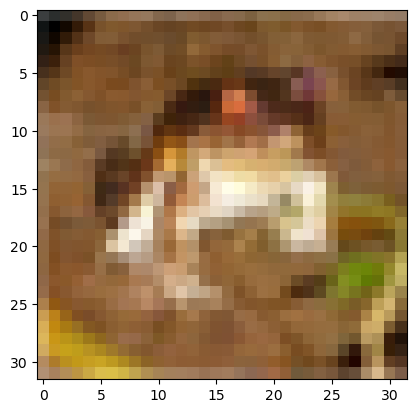

In [14]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0],cmap='gray')

In [15]:
train_y[0]

array([6], dtype=uint8)

In [16]:
#Normalize the data
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

## Build the model

In [20]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.2), #We want to drop 20% of the records after each hidden layer.
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(train_x, train_y, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
1250/1250 - 9s - loss: 2.0995 - accuracy: 0.2015 - val_loss: 1.9286 - val_accuracy: 0.3027 - 9s/epoch - 8ms/step
Epoch 2/50
1250/1250 - 9s - loss: 1.9401 - accuracy: 0.2822 - val_loss: 1.8572 - val_accuracy: 0.3207 - 9s/epoch - 7ms/step
Epoch 3/50
1250/1250 - 9s - loss: 1.8933 - accuracy: 0.3038 - val_loss: 1.8074 - val_accuracy: 0.3511 - 9s/epoch - 7ms/step
Epoch 4/50
1250/1250 - 10s - loss: 1.8683 - accuracy: 0.3187 - val_loss: 1.8268 - val_accuracy: 0.3418 - 10s/epoch - 8ms/step
Epoch 5/50
1250/1250 - 10s - loss: 1.8427 - accuracy: 0.3287 - val_loss: 1.7766 - val_accuracy: 0.3619 - 10s/epoch - 8ms/step
Epoch 6/50
1250/1250 - 10s - loss: 1.8224 - accuracy: 0.3355 - val_loss: 1.7615 - val_accuracy: 0.3722 - 10s/epoch - 8ms/step
Epoch 7/50
1250/1250 - 9s - loss: 1.8089 - accuracy: 0.3412 - val_loss: 1.7269 - val_accuracy: 0.3796 - 9s/epoch - 7ms/step
Epoch 8/50
1250/1250 - 10s - loss: 1.8011 - accuracy: 0.3471 - val_loss: 1.7344 - val_accuracy: 0.3812 - 10s/epoch - 8ms/step


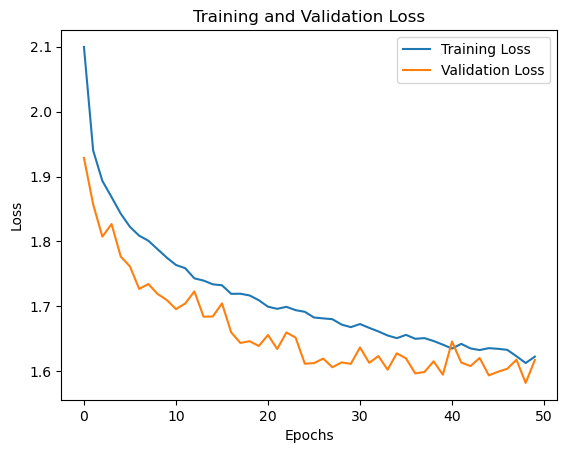

In [23]:
# Look at the loss value for both the training and validation after using dropout!
# We could do even more epochs to see where it goes.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

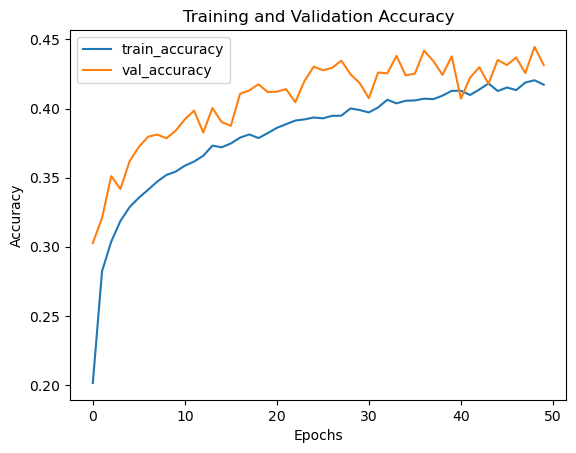

In [24]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

313/313 - 0s - loss: 1.5854 - accuracy: 0.4426 - 490ms/epoch - 2ms/step
